**Instructions**

In this lesson you learned about K-Means clustering. Sometimes K-Means is not appropriate for your data. Create a notebook using data either from these lessons or from somewhere else (credit your source) and show a different clustering method NOT using K-Means. What did you learn?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples


In [2]:
df = pd.read_csv('C:\\Users\\USER\\ArewaDS ML\\ArewaDS-Machine-Learning-Assignments\\week_6\\nigerian-songs.csv')
df

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [3]:
df.info

<bound method DataFrame.info of                          name                         album  \
0                      Sparky            Mandy & The Jungle   
1                  shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                       LITT!                         LITT!   
3    Confident / Feeling Cool               Enjoy Your Life   
4                  wanted you                         rare.   
..                        ...                           ...   
525                   Kwaroro                       Kwaroro   
526             Concert Party                   Afro Escape   
527                      Loko                    Applaudise   
528                      Gift                    Applaudise   
529                    Macoma                    Applaudise   

                  artist artist_top_genre  release_date  length  popularity  \
0          Cruel Santino  alternative r&b          2019  144000          48   
1    Odunsi (The Engine)          afropop          20

In [6]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


In [5]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

Text(0.5, 1.0, 'Top genres')

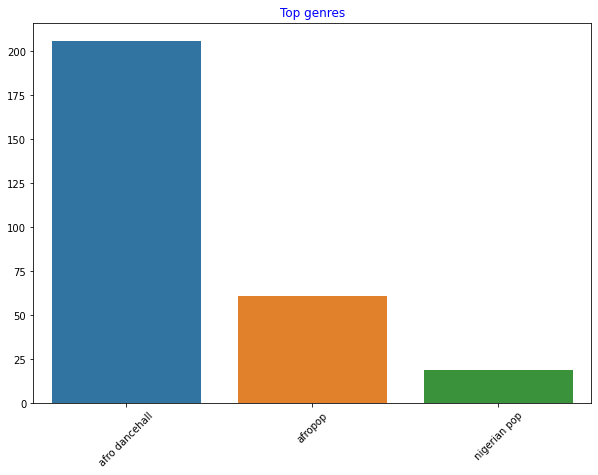

In [7]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

**other clustering method not K-means**


**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

 is an alternative clustering method to K-Means clustering. DBSCAN is a density-based clustering algorithm that groups data points together based on density and classifies outliers as noise.

 DBSCAN is primarily used for discovering clusters and identifying outliers in unlabeled data based on density. It does not require predefined labels or a ground truth to evaluate its performance. Instead, its effectiveness is typically assessed based on internal validation measures such as silhouette score or assessing the quality of the discovered clusters visually.

To evaluate the performance of DBSCAN, you can consider using metrics such as silhouette score or visual inspection of the resulting clusters to determine the effectiveness of the clustering algorithm in capturing meaningful patterns in your data. These metrics can provide insights into the compactness and separation of the clusters.

In [8]:
#LET IMPORT THE DBSCAN libries
from sklearn.cluster import DBSCAN

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.loc[:,('artist_top_genre','popularity','danceability','acousticness','loudness','energy')
           ]
y =df['artist_top_genre']
X['artist_top_genre']= le.fit_transform(X['artist_top_genre'])
y = le.transform(y)

In [13]:
print(X)

     artist_top_genre  popularity  danceability  acousticness  loudness  \
1                   1          30         0.710        0.0822    -5.640   
3                   2          14         0.894        0.7980    -4.961   
4                   1          25         0.702        0.1160    -6.044   
5                   2          26         0.803        0.1270   -10.034   
6                   2          29         0.818        0.4520    -9.840   
..                ...         ...           ...           ...       ...   
514                 0          20         0.838        0.0358    -3.723   
515                 0          14         0.786        0.1950    -4.232   
519                 1           2         0.879        0.2240    -4.602   
522                 0          26         0.863        0.0366    -3.130   
525                 0          10         0.735        0.6320    -2.582   

     energy  
1     0.683  
3     0.611  
4     0.833  
5     0.525  
6     0.587  
..      ...  
5

In [14]:
print(y)

[1 2 1 2 2 1 2 1 2 2 1 1 2 1 2 1 2 2 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 2 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 2 1 0 0 0 0 1 0 0 0 0 0 2 1 1 1 0
 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 2 2 1 0 2 2 0
 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=5, min_samples=5)
cluster_labels = dbscan.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.06223070647817252


In [18]:
dbscan =DBSCAN(eps =3, min_samples=3) # performing the clustering
cluster_labels = dbscan.fit_predict(df)
cluster_labels



array([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

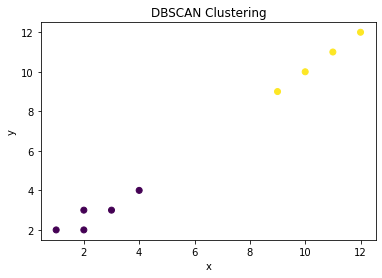

In [21]:
# Plot the clusters
plt.scatter(df['x'], df['y'], c=cluster_labels)
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering')
plt.show()